In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

In [2]:
# Load and clean data
df = pd.read_csv('/content/drive/MyDrive/capstone/diseases.csv')
df_clean = df.dropna(subset=['symptoms'])
df_clean = df_clean[df_clean['symptoms'] != '']

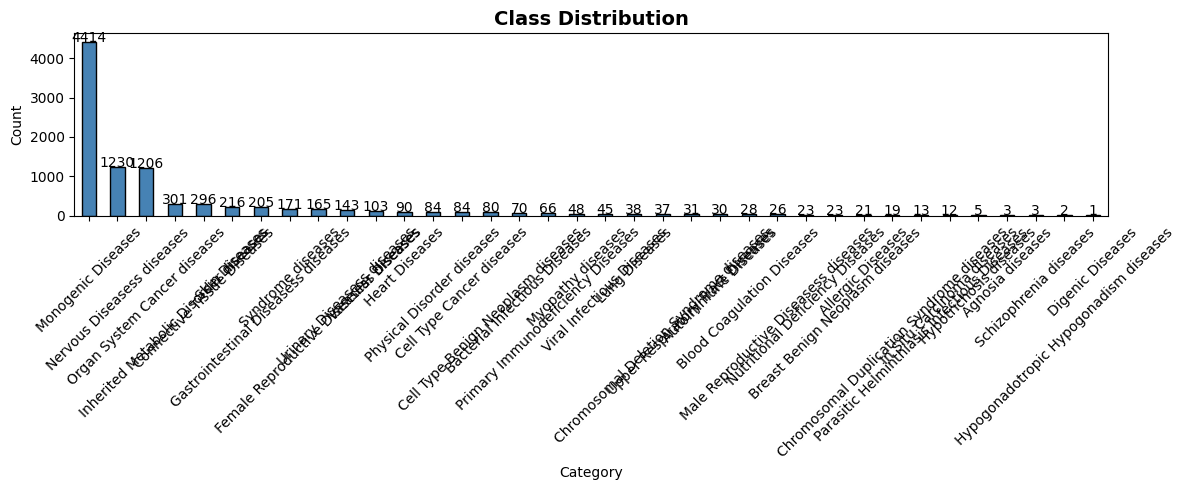

In [3]:
# 1. Category Distribution (Class Balance)
plt.figure(figsize=(12, 5))
category_counts = df_clean['category'].value_counts()
category_counts.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Class Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
for i, v in enumerate(category_counts.values):
    plt.text(i, v + 0.5, str(v), ha='center')
plt.tight_layout()
plt.show()

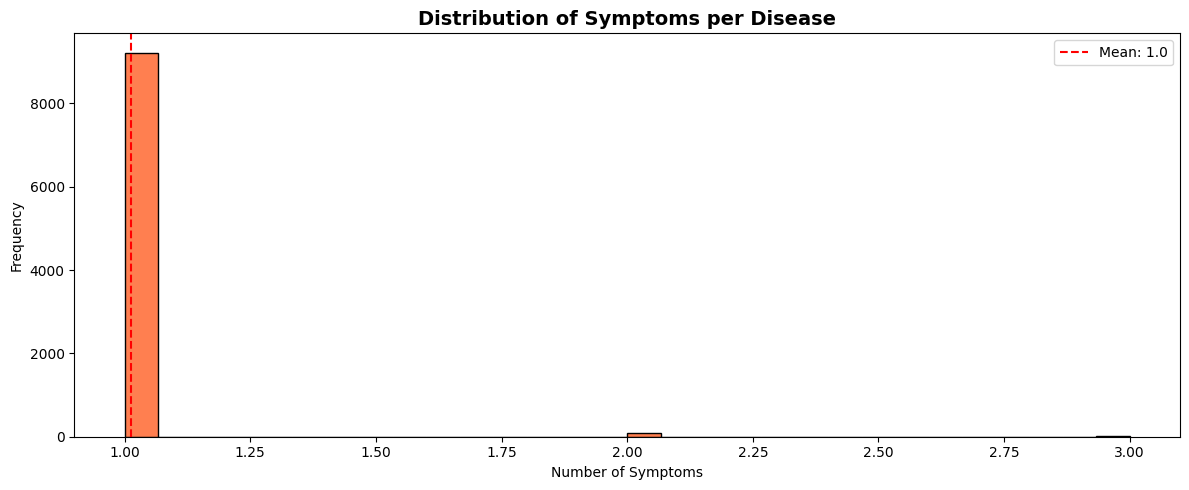

In [4]:
# 2. Symptoms per Disease Distribution
df_clean['symptom_count'] = df_clean['symptoms'].str.split(',').str.len()
plt.figure(figsize=(12, 5))
plt.hist(df_clean['symptom_count'], bins=30, color='coral', edgecolor='black')
plt.axvline(df_clean['symptom_count'].mean(), color='red', linestyle='--',
            label=f'Mean: {df_clean["symptom_count"].mean():.1f}')
plt.title('Distribution of Symptoms per Disease', fontsize=14, fontweight='bold')
plt.xlabel('Number of Symptoms')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

/tmp/ipython-input-3632148684.py:15: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


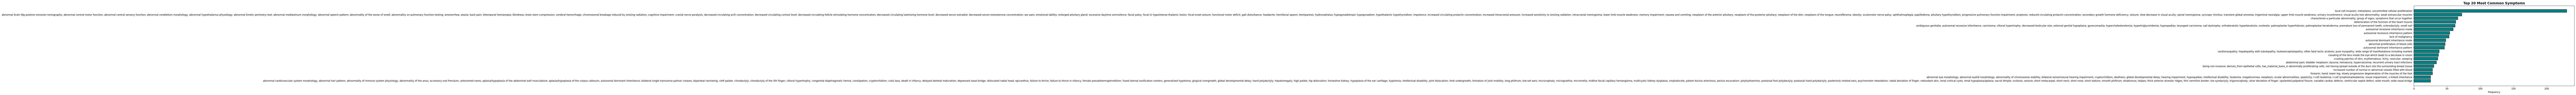

In [5]:
# 3. Top 20 Most Common Symptoms
all_symptoms = []
for symptoms in df_clean['symptoms']:
    all_symptoms.extend([s.strip().lower() for s in symptoms.split(',')])

symptom_freq = Counter(all_symptoms)
top_symptoms = pd.DataFrame(symptom_freq.most_common(20), columns=['Symptom', 'Frequency'])

plt.figure(figsize=(12, 6))
plt.barh(range(len(top_symptoms)), top_symptoms['Frequency'], color='teal', edgecolor='black')
plt.yticks(range(len(top_symptoms)), top_symptoms['Symptom'])
plt.xlabel('Frequency')
plt.title('Top 20 Most Common Symptoms', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [6]:
# 4. Category-Symptom Correlation Heatmap
category_symptom_matrix = []
categories = df_clean['category'].unique()
top_15_symptoms = [s[0] for s in symptom_freq.most_common(15)]

for category in categories:
    category_data = df_clean[df_clean['category'] == category]
    category_symptoms = []
    for symptoms in category_data['symptoms']:
        category_symptoms.extend([s.strip().lower() for s in symptoms.split(',')])
    category_freq = Counter(category_symptoms)
    row = [category_freq.get(symptom, 0) for symptom in top_15_symptoms]
    category_symptom_matrix.append(row)

heatmap_df = pd.DataFrame(category_symptom_matrix, index=categories, columns=top_15_symptoms)

plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_df, annot=True, fmt='d', cmap='YlOrRd', linewidths=0.5)
plt.title('Symptom-Category Correlation', fontsize=14, fontweight='bold')
plt.xlabel('Symptoms')
plt.ylabel('Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-413882322.py:23: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


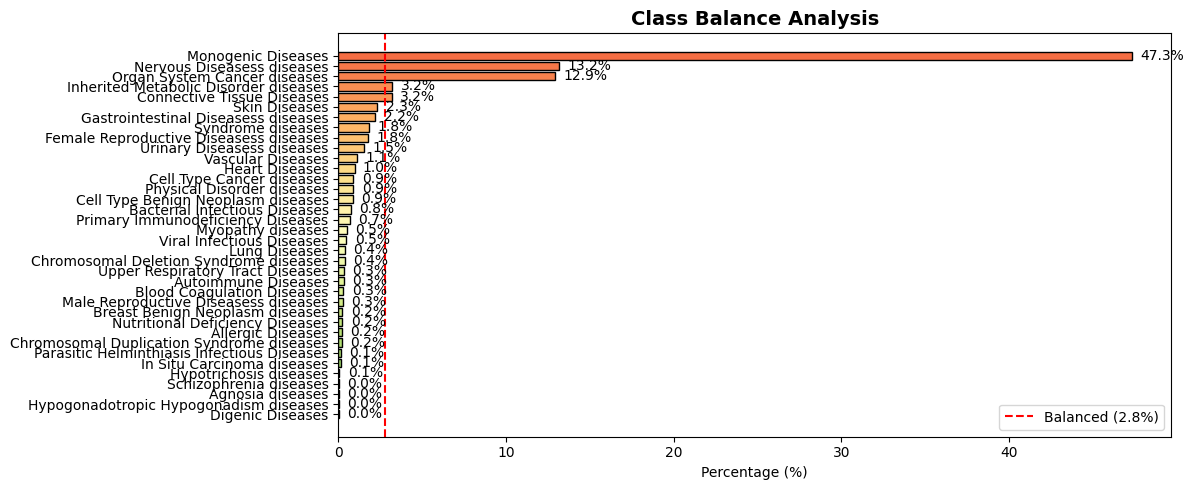

In [7]:
# 5. Class Imbalance Analysis
plt.figure(figsize=(12, 5))
category_percentages = (df_clean['category'].value_counts() / len(df_clean) * 100).sort_values()
colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(category_percentages)))
plt.barh(range(len(category_percentages)), category_percentages.values, color=colors, edgecolor='black')
plt.yticks(range(len(category_percentages)), category_percentages.index)
plt.xlabel('Percentage (%)')
plt.title('Class Balance Analysis', fontsize=14, fontweight='bold')
plt.axvline(x=100/len(categories), color='red', linestyle='--', label=f'Balanced ({100/len(categories):.1f}%)')
plt.legend()
for i, v in enumerate(category_percentages.values):
    plt.text(v + 0.5, i, f'{v:.1f}%', va='center')
plt.tight_layout()
plt.show()

In [8]:
# df.to_csv('/content/drive/MyDrive/capstone/diseases.csv', index=False)++